Let's look at some "blessed" data from the QuarkNet detectors for one DAQ on a particular day. Rather than parse the file and handle column and row content ourselves let's use Pandas http://pandas.pydata.org/

In [78]:
import string
import pandas as pd

file_name = '6148.2016.0518.0.bless'
fn = string.split(file_name, '.')

daq = fn[0]
date = pd.to_datetime(fn[1]+fn[2], format='%Y%m%d')

print 'DAQ: ', daq
print 'Date:', date

ifile = open('data/qn/'+file_name, 'r')
print ifile.readline()
ifile.close()

DAQ:  6148
Date: 2016-05-18 00:00:00
###Seconds (since Midnight UTC) 	 Chan 0 rate 	 Error in Chan0 	 Chan 1 rate 	 Error in Chan1 	 Chan 2 rate 	 Error in Chan2 	 Chan 3 rate 	 Error in Chan3 	 Trigger rate	Error in Triggers 	 Raw BA output 	 Temp (DegC) 	 Bus Voltage 	 #GPS satellites in view 



The column names are too long and have whitespaces so let's rename them and then load into a data frame:

In [58]:
names = ['sec']
names += ['rate0', 'err0', 'rate1', 'err1', 'rate2', 'err2', 'rate3', 'err3']
names += ['trigRate', 'trigRateErr', 'pressure', 'temp', 'voltage', 'nGPS']

df = pd.read_csv('data/qn/'+file_name, delimiter='\t', header=0, names=names)
df.head()

,sec,rate0,err0,rate1,err1,rate2,err2,rate3,err3,trigRate,trigRateErr,pressure,temp,voltage,nGPS
0,660,22.15947,0.27133,21.13289,0.26497,21.69767,0.26849,21.34551,0.26630,0.01993,0.00814,1017,23.7,3.349,4
1,961,22.72425,0.27477,21.35880,0.26638,21.09302,0.26472,21.75748,0.26886,0.02990,0.00997,1017,23.6,3.349,5
2,1261,22.20667,0.27207,21.37000,0.26690,21.43667,0.26731,20.67333,0.26251,0.00667,0.00472,1017,23.5,3.349,4
3,1562,22.20266,0.27159,21.50166,0.26727,21.39535,0.26661,21.23920,0.26564,0.01993,0.00814,1017,23.5,3.349,3
4,1862,22.56000,0.27423,21.65333,0.26866,21.84667,0.26986,21.45333,0.26742,0.02000,0.00816,1017,23.4,3.346,4


In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Now let's reproduce some standard blessing plots:

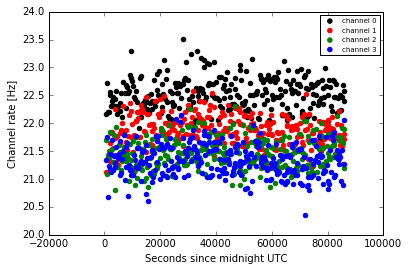

In [80]:
r0 = plt.scatter(df['sec'], df['rate0'], color='k')
r1 = plt.scatter(df['sec'], df['rate1'], color='r')
r2 = plt.scatter(df['sec'], df['rate2'], color='g')
r3 = plt.scatter(df['sec'], df['rate3'], color='b')

plt.legend((r0,r1,r2,r3), ('channel 0', 'channel 1', 'channel 2', 'channel 3'), scatterpoints=1, fontsize=7)
plt.xlabel('Seconds since midnight UTC')
plt.ylabel('Channel rate [Hz]')
plt.show()

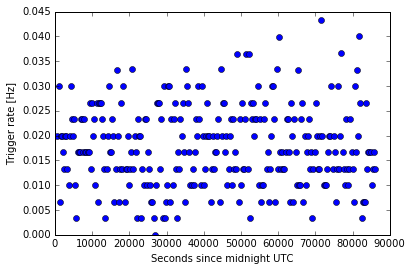

In [81]:
plt.plot(df['sec'], df['trigRate'], 'o')
plt.xlabel('Seconds since midnight UTC')
plt.ylabel('Trigger rate [Hz]')
plt.show()

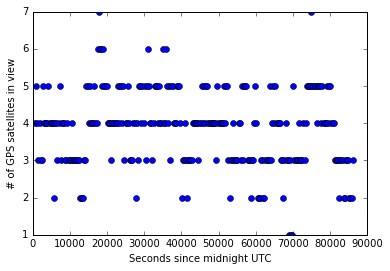

In [82]:
plt.plot(df['sec'], df['nGPS'], 'o')
plt.xlabel('Seconds since midnight UTC')
plt.ylabel('# of GPS satellites in view')
plt.show()

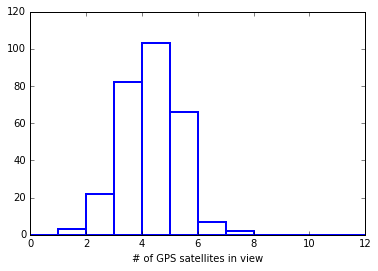

In [83]:
ngps = np.histogram(df['nGPS'], bins=12, range=(0,12))
hist, bins = ngps
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='', linewidth=2, edgecolor='b')
plt.xlabel('# of GPS satellites in view')
plt.xlim(0,12)
plt.show()

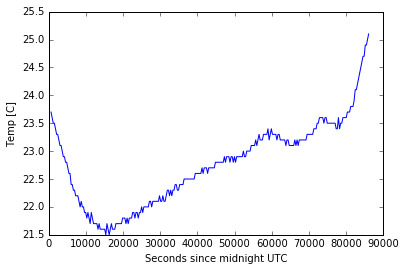

In [84]:
plt.plot(df['sec'], df['temp'])
plt.xlabel('Seconds since midnight UTC')
plt.ylabel('Temp [C]')
plt.show()

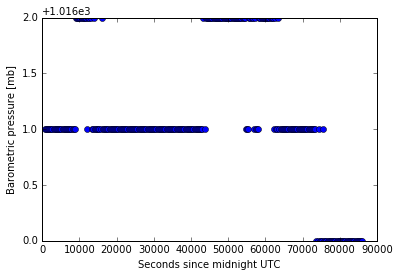

In [85]:
plt.plot(df['sec'], df['pressure'], 'o')
plt.xlabel('Seconds since midnight UTC')
plt.ylabel('Barometric pressure [mb]')
plt.show()

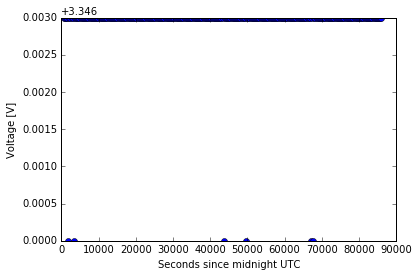

In [86]:
plt.plot(df['sec'], df['voltage'], 'o')
plt.xlabel('Seconds since midnight UTC')
plt.ylabel('Voltage [V]')
plt.show()